In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

In [3]:
with open("profiles.pkl","rb") as fp:
    df = pickle.load(fp)    

In [4]:
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,5,3,4,1,3,6,7
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,7,9,5,1,9,4,0
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,1,2,6,5,6,5,4
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,5,2,7,8,2,6,6
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,6,6,6,4,3,6,3
...,...,...,...,...,...,...,...,...
6595,Typical pop culture nerd. Infuriatingly humble internet maven. Alcohol evangelist.,7,9,0,0,2,2,4
6596,Avid web junkie. Lifelong alcohol guru. Hardcore reader. Award-winning twitter evangelist.,4,3,6,3,7,7,2
6597,Music ninja. Bacon fanatic. Reader. Total communicator. Unapologetic beer specialist.,1,4,0,4,9,2,5
6598,Communicator. Bacon lover. Award-winning introvert. Amateur internet ninja.,6,2,0,3,8,9,1


In [5]:
matchfinder_data = pd.read_csv("matchfinder_data.csv")

In [6]:
matchfinder_data.head()

,Unnamed: 0,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,5,3,4,1,3,6,7
1,1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,7,9,5,1,9,4,0
2,2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,1,2,6,5,6,5,4
3,3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,5,2,7,8,2,6,6
4,4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,6,6,6,4,3,6,3


In [7]:
matchfinder_data.tail()

,Unnamed: 0,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
6595,6595,Typical pop culture nerd. Infuriatingly humble internet maven. Alcohol evangelist.,7,9,0,0,2,2,4
6596,6596,Avid web junkie. Lifelong alcohol guru. Hardcore reader. Award-winning twitter evangelist.,4,3,6,3,7,7,2
6597,6597,Music ninja. Bacon fanatic. Reader. Total communicator. Unapologetic beer specialist.,1,4,0,4,9,2,5
6598,6598,Communicator. Bacon lover. Award-winning introvert. Amateur internet ninja.,6,2,0,3,8,9,1
6599,6599,Unapologetic tv aficionado. Devoted twitter enthusiast. Typical coffee guru. Falls down a lot.,2,1,8,7,0,5,5


In [8]:
scaler = MinMaxScaler()
df = df[['Bios']].join(pd.DataFrame(scaler.fit_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,0.555556,0.333333,0.444444,0.111111,0.333333,0.666667,0.777778
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,0.777778,1.000000,0.555556,0.111111,1.000000,0.444444,0.000000
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,0.111111,0.222222,0.666667,0.555556,0.666667,0.555556,0.444444
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,0.555556,0.222222,0.777778,0.888889,0.222222,0.666667,0.666667
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,0.666667,0.666667,0.666667,0.444444,0.333333,0.666667,0.333333
...,...,...,...,...,...,...,...,...
6595,Typical pop culture nerd. Infuriatingly humble internet maven. Alcohol evangelist.,0.777778,1.000000,0.000000,0.000000,0.222222,0.222222,0.444444
6596,Avid web junkie. Lifelong alcohol guru. Hardcore reader. Award-winning twitter evangelist.,0.444444,0.333333,0.666667,0.333333,0.777778,0.777778,0.222222
6597,Music ninja. Bacon fanatic. Reader. Total communicator. Unapologetic beer specialist.,0.111111,0.444444,0.000000,0.444444,1.000000,0.222222,0.555556
6598,Communicator. Bacon lover. Award-winning introvert. Amateur internet ninja.,0.666667,0.222222,0.000000,0.333333,0.888889,1.000000,0.111111


In [9]:
df_c = df.copy()
import nltk
lemmatizer = WordNetLemmatizer()

def tokenize(text):
    stops = stopwords.words('english')
    text = text.lower()
    text = text.replace('.', '')
    text = text.split(' ')
    text = [lemmatizer.lemmatize(i) for i in text if i not in stops]
    return text
df_c['Bios'] = df_c.Bios.apply(tokenize)

Number of unique words:  104


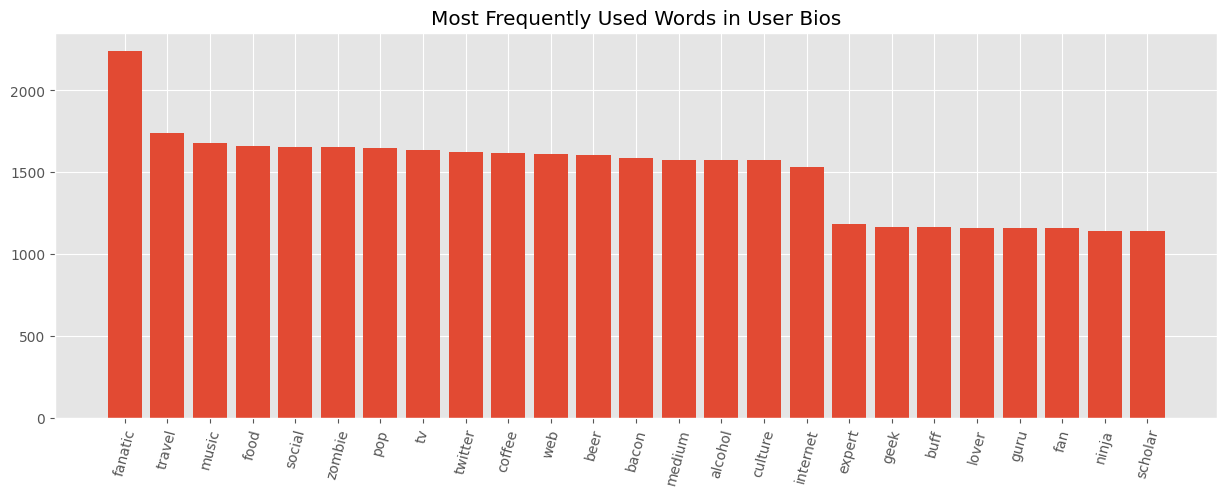

In [10]:
total_vocab = set()

for bio in df_c['Bios']:
    total_vocab.update(bio)

print("Number of unique words: ",len(total_vocab))

words = []

for bio in df_c['Bios']:
    words.extend(bio)

bio_freq = FreqDist(words)
bio_freq.most_common(104)

plt.style.use('ggplot')
plt.figure(figsize=(15,5))
plt.bar(*zip(*bio_freq.most_common(25)))
plt.xticks(rotation=75)
plt.title('Most Frequently Used Words in User Bios')
plt.show()

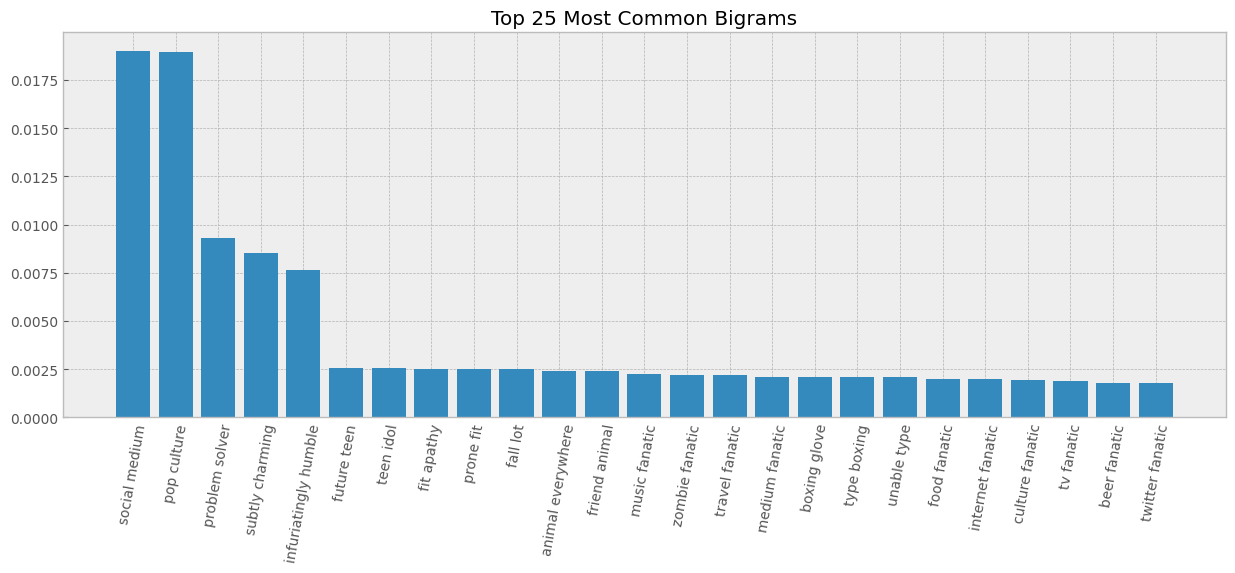

In [11]:
bigram_meas = BigramAssocMeasures()

bio_finder = BigramCollocationFinder.from_words(words)

bio_scored = bio_finder.score_ngrams(bigram_meas.raw_freq)

bio_scored[:50]

bg = list(map(lambda x: x[0][0] + ' ' + x[0][1], bio_scored[:50]))

bio_scores = list(map(lambda x: x[1], bio_scored[:50]))

bigrams = list(zip(bg, bio_scores))

plt.style.use('bmh')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bigrams[:25]))
plt.xticks(rotation=80)
plt.title('Top 25 Most Common Bigrams')
plt.show()

In [12]:
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['Bios'])

In [13]:
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
df_wrds

,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,animals,apathy,avid,award,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6596,0,0,1,0,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
6597,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6598,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [14]:
new_df = pd.concat([df, df_wrds], axis=1)

new_df.drop('Bios', axis=1, inplace=True)

new_df

,Movies,TV,Religion,Music,Sports,Books,Politics,advocate,aficionado,alcohol,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0.555556,0.333333,0.444444,0.111111,0.333333,0.666667,0.777778,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.777778,1.000000,0.555556,0.111111,1.000000,0.444444,0.000000,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.111111,0.222222,0.666667,0.555556,0.666667,0.555556,0.444444,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.555556,0.222222,0.777778,0.888889,0.222222,0.666667,0.666667,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.666667,0.666667,0.666667,0.444444,0.333333,0.666667,0.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,0.777778,1.000000,0.000000,0.000000,0.222222,0.222222,0.444444,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6596,0.444444,0.333333,0.666667,0.333333,0.777778,0.777778,0.222222,0,0,1,...,0,0,0,1,0,1,0,0,0,0
6597,0.111111,0.444444,0.000000,0.444444,1.000000,0.222222,0.555556,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6598,0.666667,0.222222,0.000000,0.333333,0.888889,1.000000,0.111111,0,0,0,...,0,0,0,0,0,1,0,0,0,0


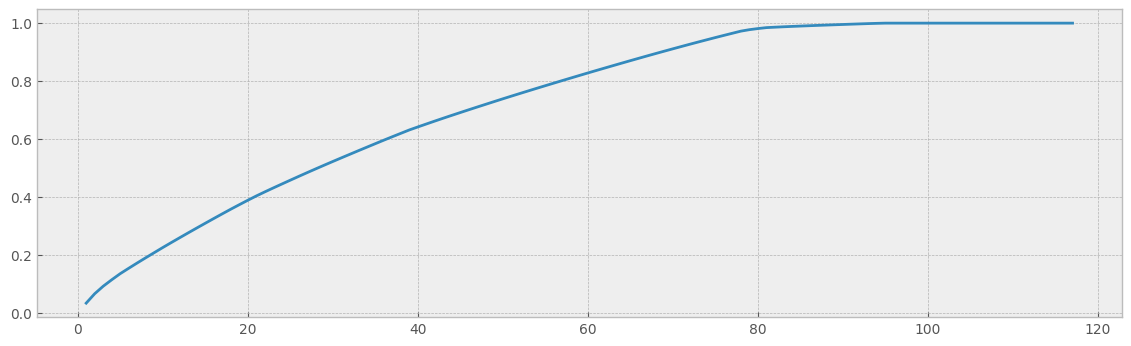

Number features: 85
Total Variance Explained: 0.9910536253090321


In [15]:
from sklearn.decomposition import PCA

pca = PCA()

df_pca = pca.fit_transform(new_df)

plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,new_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_99 = len(total_explained_variance[total_explained_variance>=.99])
n_to_reach_99 = new_df.shape[1] - n_over_99

print(f"Number features: {n_to_reach_99}\nTotal Variance Explained: {total_explained_variance[n_to_reach_99]}")

In [16]:
pca = PCA(n_components=n_to_reach_99)

df_pca = pca.fit_transform(new_df)

pca.explained_variance_ratio_.cumsum()[-1]

0.9898749722757189

In [17]:
cluster_cnt = [i for i in range(2, 10, 1)]

ch_scores = []

s_scores = []

db_scores = []

for i in tqdm(cluster_cnt):
    
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(df_pca)
    
    cluster_assignments = hac.labels_
    
    ch_scores.append(calinski_harabasz_score(df_pca, cluster_assignments))
    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

/var/folders/h5/75zmdrl12nl1b6dbxkw8wzsh0000gn/T/ipykernel_3419/1470563432.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(cluster_cnt):


  0%|          | 0/8 [00:00<?, ?it/s]

In [18]:
def plot_evaluation(y, x=cluster_cnt):
    
    
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

Max Value:
Cluster #    Cluster Score
2     119.088724

Min Value:
Cluster #    Cluster Score
9      89.462603


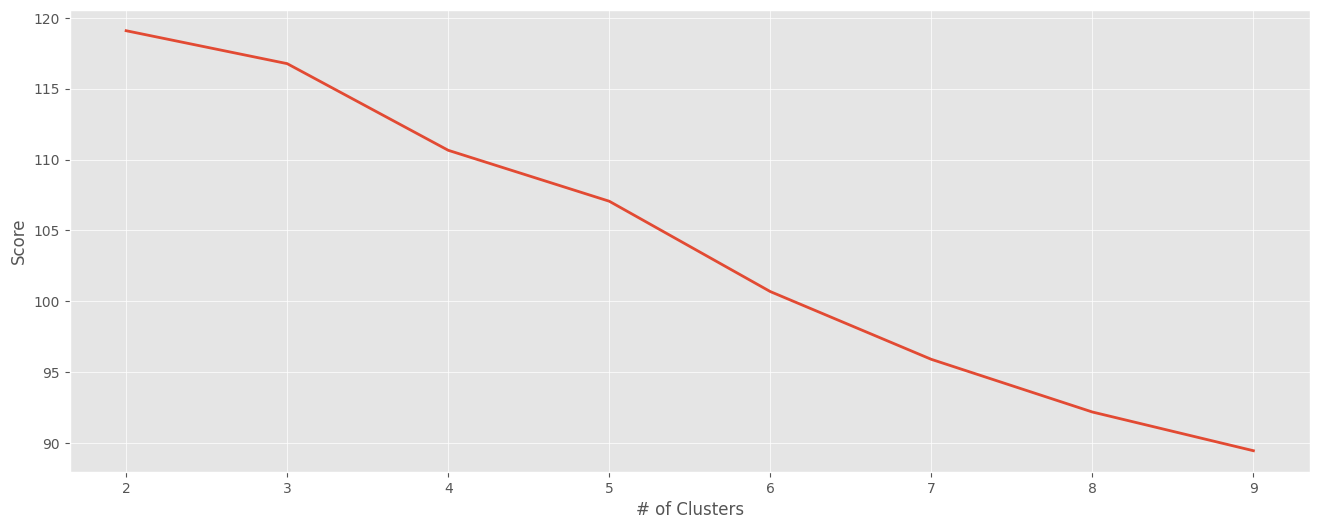

In [19]:
plot_evaluation(ch_scores)

Max Value:
Cluster #    Cluster Score
8       0.029336

Min Value:
Cluster #    Cluster Score
2       0.016023


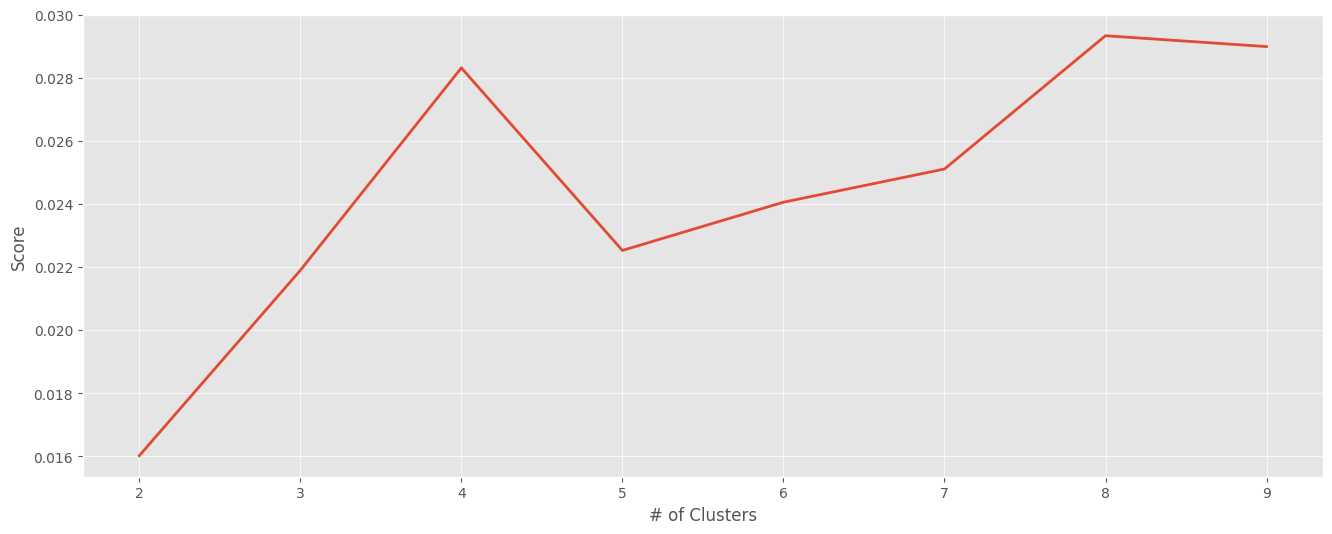

In [20]:
plot_evaluation(s_scores)

Max Value:
Cluster #    Cluster Score
2        5.34173

Min Value:
Cluster #    Cluster Score
8        4.09311


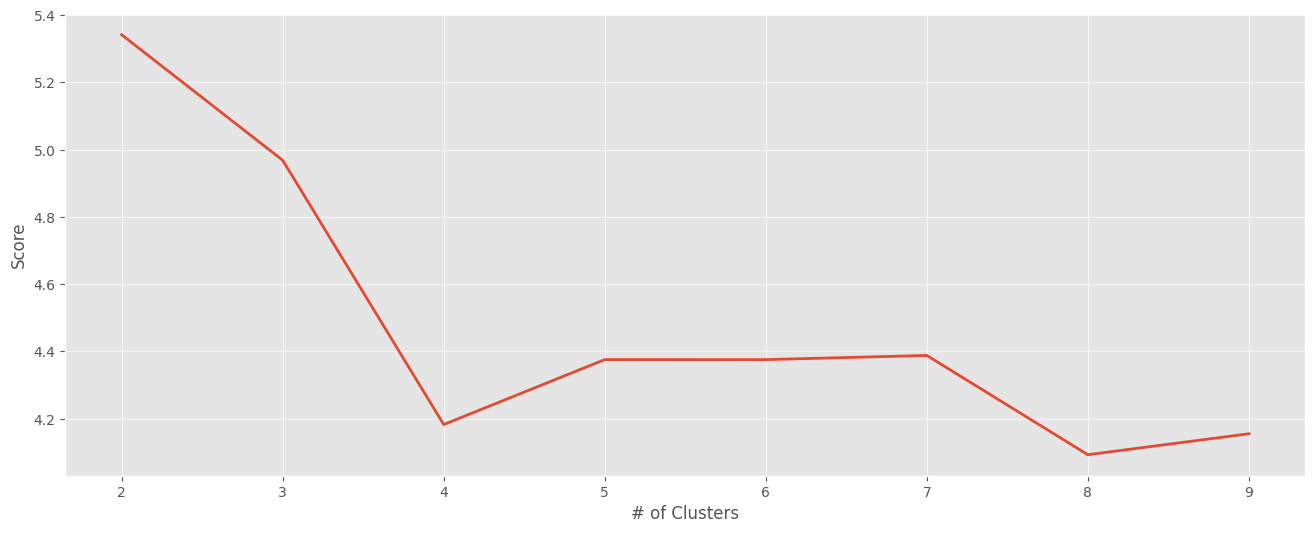

In [21]:
plot_evaluation(db_scores)

In [22]:
hac = AgglomerativeClustering(n_clusters=12)
hac.fit(df_pca)
cluster_assignments = hac.labels_

In [23]:
df = df[['Bios']].join(pd.DataFrame(scaler.inverse_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,5.0,3.0,4.0,1.0,3.0,6.0,7.0
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,7.0,9.0,5.0,1.0,9.0,4.0,0.0
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,1.0,2.0,6.0,5.0,6.0,5.0,4.0
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,5.0,2.0,7.0,8.0,2.0,6.0,6.0
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,6.0,6.0,6.0,4.0,3.0,6.0,3.0
...,...,...,...,...,...,...,...,...
6595,Typical pop culture nerd. Infuriatingly humble internet maven. Alcohol evangelist.,7.0,9.0,0.0,0.0,2.0,2.0,4.0
6596,Avid web junkie. Lifelong alcohol guru. Hardcore reader. Award-winning twitter evangelist.,4.0,3.0,6.0,3.0,7.0,7.0,2.0
6597,Music ninja. Bacon fanatic. Reader. Total communicator. Unapologetic beer specialist.,1.0,4.0,0.0,4.0,9.0,2.0,5.0
6598,Communicator. Bacon lover. Award-winning introvert. Amateur internet ninja.,6.0,2.0,0.0,3.0,8.0,9.0,1.0


In [24]:
df['Cluster #'] = cluster_assignments
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics,Cluster #
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,5.0,3.0,4.0,1.0,3.0,6.0,7.0,9
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,7.0,9.0,5.0,1.0,9.0,4.0,0.0,9
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,1.0,2.0,6.0,5.0,6.0,5.0,4.0,1
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,5.0,2.0,7.0,8.0,2.0,6.0,6.0,9
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,6.0,6.0,6.0,4.0,3.0,6.0,3.0,10
...,...,...,...,...,...,...,...,...,...
6595,Typical pop culture nerd. Infuriatingly humble internet maven. Alcohol evangelist.,7.0,9.0,0.0,0.0,2.0,2.0,4.0,9
6596,Avid web junkie. Lifelong alcohol guru. Hardcore reader. Award-winning twitter evangelist.,4.0,3.0,6.0,3.0,7.0,7.0,2.0,2
6597,Music ninja. Bacon fanatic. Reader. Total communicator. Unapologetic beer specialist.,1.0,4.0,0.0,4.0,9.0,2.0,5.0,0
6598,Communicator. Bacon lover. Award-winning introvert. Amateur internet ninja.,6.0,2.0,0.0,3.0,8.0,9.0,1.0,9


In [25]:
with open("profiles.pkl", "wb") as fp:
    pickle.dump(df, fp)

In [26]:
import random
rand_cluster = random.choice(df['Cluster #'].unique())
print("For Cluster Group #", rand_cluster)
group = df[df['Cluster #']==rand_cluster].drop('Cluster #', axis=1)
group

For Cluster Group # 6


,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
11,Twitter guru. Food aficionado. Subtly charming coffee ninja. Incurable web practitioner. Travel evangelist. Hardcore music nerd. Devoted bacon maven.,0.0,0.0,2.0,2.0,3.0,8.0,9.0
73,Problem solver. Web evangelist. Communicator. Alcohol lover. Total tv geek. Twitter expert. Future teen idol. Subtly charming travel buff.,5.0,7.0,2.0,8.0,3.0,0.0,1.0
121,Coffee junkie. Certified zombie geek. Writer. Web fanatic. Subtly charming beeraholic. Travel enthusiast. Music evangelist.,0.0,1.0,9.0,1.0,9.0,3.0,2.0
162,Passionate troublemaker. Reader. Evil alcohol junkie. Zombie ninja. Gamer. Beer guru. Subtly charming web evangelist.,6.0,3.0,3.0,9.0,8.0,5.0,3.0
231,Subtly charming alcohol evangelist. Tv nerd. Amateur introvert. Unapologetic pop culture ninja.,7.0,4.0,4.0,9.0,6.0,8.0,4.0
...,...,...,...,...,...,...,...,...
6531,Subtly charming coffee scholar. Writer. Typical pop culture fan. Internet ninja. Introvert.,9.0,3.0,8.0,1.0,9.0,5.0,5.0
6537,Incurable internetaholic. Subtly charming food specialist. Bacon fanatic. Thinker.,5.0,1.0,4.0,7.0,0.0,0.0,3.0
6543,Subtly charming gamer. Entrepreneur. Wannabe bacon maven. Beer enthusiast. Friendly organizer.,5.0,7.0,7.0,0.0,1.0,1.0,5.0
6572,Music fanatic. Tv enthusiast. Professional bacon aficionado. Explorer. Subtly charming writer.,7.0,1.0,0.0,2.0,9.0,8.0,3.0


In [27]:
cluster_x = vectorizer.fit_transform(group['Bios'])
cluster_v = pd.DataFrame(cluster_x.toarray(), index=group.index, columns=vectorizer.get_feature_names())
cluster_v

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,avid,award,bacon,baconaholic,...,twitteraholic,typical,unapologetic,wannabe,web,webaholic,winning,writer,zombie,zombieaholic
11,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
73,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
162,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
231,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6531,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6537,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6543,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
6572,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
group = group.join(cluster_v)

group.drop('Bios', axis=1, inplace=True)

group

,Movies,TV,Religion,Music,Sports,Books,Politics,advocate,aficionado,alcohol,...,twitteraholic,typical,unapologetic,wannabe,web,webaholic,winning,writer,zombie,zombieaholic
11,0.0,0.0,2.0,2.0,3.0,8.0,9.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
73,5.0,7.0,2.0,8.0,3.0,0.0,1.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
121,0.0,1.0,9.0,1.0,9.0,3.0,2.0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
162,6.0,3.0,3.0,9.0,8.0,5.0,3.0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
231,7.0,4.0,4.0,9.0,6.0,8.0,4.0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6531,9.0,3.0,8.0,1.0,9.0,5.0,5.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6537,5.0,1.0,4.0,7.0,0.0,0.0,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6543,5.0,7.0,7.0,0.0,1.0,1.0,5.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6572,7.0,1.0,0.0,2.0,9.0,8.0,3.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
corr_group = group.T.corr()

corr_group

,11,73,121,162,231,265,297,299,323,327,...,6449,6479,6490,6492,6501,6531,6537,6543,6572,6580
11,1.000000,0.160509,0.467508,0.522183,0.612194,0.530749,0.512273,0.411794,0.526628,0.424059,...,0.285264,0.561358,0.631538,0.529763,0.436958,0.533463,0.326723,0.377303,0.604462,0.656894
73,0.160509,1.000000,0.309167,0.754846,0.735689,0.645679,0.792271,0.653464,0.666754,0.743907,...,0.666889,0.745949,0.502116,0.749496,0.733337,0.499426,0.715034,0.547342,0.417312,0.500064
121,0.467508,0.309167,1.000000,0.595534,0.544591,0.693779,0.339350,0.226415,0.387560,0.389170,...,0.444697,0.581308,0.517791,0.469281,0.696517,0.757158,0.312892,0.499423,0.550328,0.190574
162,0.522183,0.754846,0.595534,1.000000,0.932940,0.852964,0.772326,0.756033,0.730394,0.714891,...,0.735781,0.806422,0.622924,0.899944,0.770047,0.752604,0.697904,0.471433,0.779724,0.659733
231,0.612194,0.735689,0.544591,0.932940,1.000000,0.891519,0.772811,0.857520,0.787469,0.821376,...,0.719329,0.788447,0.735855,0.897934,0.819083,0.782754,0.719002,0.547298,0.792458,0.751986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6531,0.533463,0.499426,0.757158,0.752604,0.782754,0.834022,0.453261,0.591770,0.706425,0.684241,...,0.723521,0.751445,0.804572,0.664182,0.745918,1.000000,0.539823,0.720347,0.793830,0.339151
6537,0.326723,0.715034,0.312892,0.697904,0.719002,0.524489,0.551820,0.630855,0.889932,0.735273,...,0.342319,0.709370,0.705505,0.524748,0.621331,0.539823,1.000000,0.553765,0.359938,0.593822
6543,0.377303,0.547342,0.499423,0.471433,0.547298,0.609337,0.485080,0.419575,0.678738,0.775094,...,0.518859,0.717337,0.820572,0.446214,0.727567,0.720347,0.553765,1.000000,0.365681,0.244221
6572,0.604462,0.417312,0.550328,0.779724,0.792458,0.813769,0.522661,0.684310,0.512538,0.538901,...,0.795373,0.588571,0.567198,0.804666,0.566903,0.793830,0.359938,0.365681,1.000000,0.513183


In [31]:
random_user = random.choice(corr_group.index)
print("random_user" , random_user)

print("Top 5 most similar users to User #", random_user, '\n')

top_5_sim = corr_group[[random_user]].sort_values(by=[random_user],axis=0, ascending=False)[1:6]

print(top_5_sim)

print("\nThe most similar user to User #", 6594, "is User #", top_5_sim.index[0])




random_user 1499
Top 5 most similar users to User # 1499 

          1499
6425  0.904013
6085  0.861041
5929  0.860178
3297  0.858547
3920  0.858473

The most similar user to User # 6594 is User # 6425


In [32]:
A = group.loc[random_user,:]
A

Movies          6.0
TV              1.0
Religion        0.0
Music           7.0
Sports          6.0
               ... 
webaholic       0.0
winning         0.0
writer          0.0
zombie          0.0
zombieaholic    0.0
Name: 1499, Length: 103, dtype: float64

In [47]:
t = list(top_5_sim.index.values)

In [48]:
t

[6425, 6085, 5929, 3297, 3920]

In [61]:
B = group.loc[t[0],:]
C = group.loc[t[1],:]
D = group.loc[t[2],:]
E = group.loc[t[3],:]
F = group.loc[t[4],:]
user_name = "User No."+str(random_user)
data = {
    user_name:A,
    "Matched Profile 1":B,
    "Matched Profile 2":C,
    "Matched Profile 3":D,
    "Matched Profile 4":E,
    "Matched Profile 5":F
}

df1 = pd.concat(data,axis = 1)



In [62]:
df1

,User No.1499,Matched Profile 1,Matched Profile 2,Matched Profile 3,Matched Profile 4,Matched Profile 5
Movies,6.0,5.0,8.0,9.0,8.0,9.0
TV,1.0,0.0,1.0,1.0,4.0,1.0
Religion,0.0,1.0,1.0,2.0,6.0,3.0
Music,7.0,8.0,4.0,7.0,9.0,6.0
Sports,6.0,9.0,7.0,7.0,8.0,9.0
...,...,...,...,...,...,...
webaholic,0.0,0.0,0.0,0.0,0.0,0.0
winning,0.0,0.0,0.0,0.0,0.0,0.0
writer,0.0,0.0,0.0,0.0,0.0,0.0
zombie,0.0,0.0,0.0,0.0,0.0,0.0
